# Decision Tree & Random Forest Regression

![Namespace Labs](../../../../labs.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('autos.csv')

In [3]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450


In [4]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329171,3.255317,10.142537,104.256098,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270875,0.313598,3.972040,39.519211,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


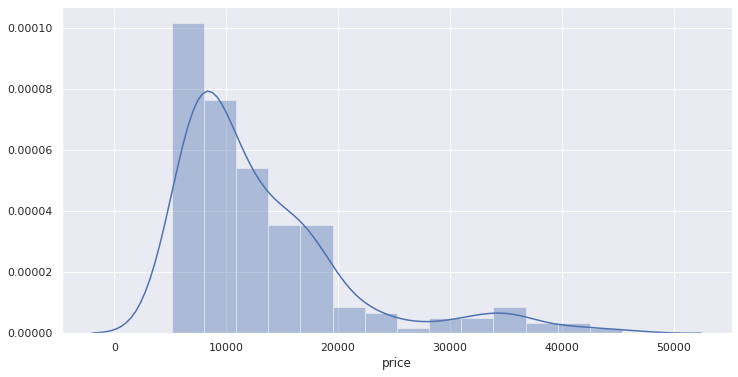

In [5]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'])

In [6]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [7]:
cats = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location','engine-type', 
        'num-of-cylinders','engine-size', 'fuel-system']

In [8]:
auto = pd.get_dummies(df,columns = cats, drop_first=True )

In [9]:
auto.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,...,engine-size_304,engine-size_308,engine-size_326,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500,...,0,0,0,0,0,0,0,1,0,0


In [10]:
X = auto.drop('price',axis=1)
y = auto['price']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree = DecisionTreeRegressor()

In [15]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
predictions = tree.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
print('The Mean Absolute Error is', mean_absolute_error(y_test, predictions))
print('The Mean Squarred Error is ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is ', np.sqrt(mean_squared_error(y_test, predictions)))

The Mean Absolute Error is 2394.5220588235293
The Mean Squarred Error is  18137751.04779412
Root Mean Squared Error is  4258.843862809967


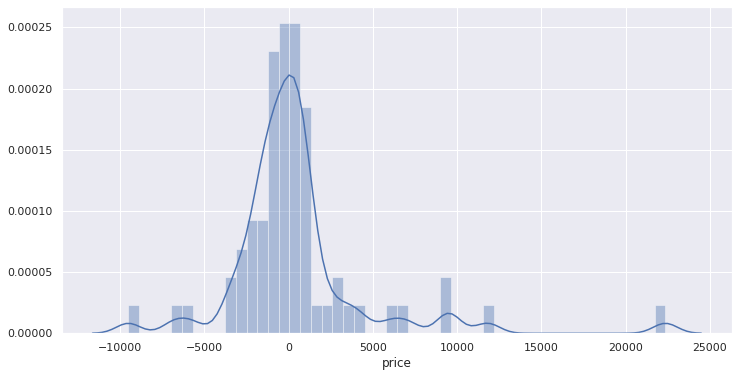

In [19]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions),bins=50)

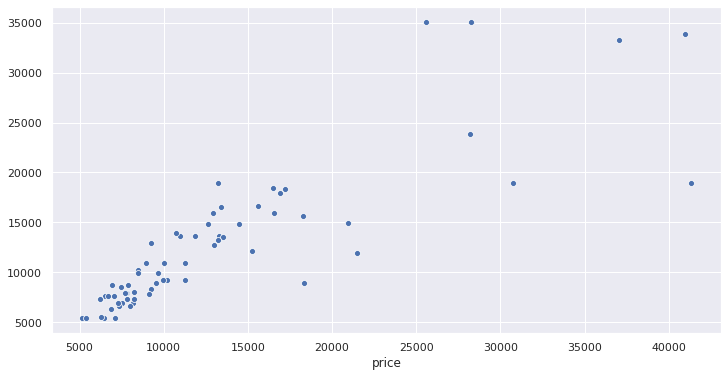

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_test,predictions)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(n_estimators=500,random_state=42)

In [23]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [24]:
rf_predictions = rf.predict(X_test)

In [26]:
rf.score(X_test,y_test) 
# The best possible score is 1.0 and it can be negative (because the
# model can be arbitrarily worse). A constant model that always
# predicts the expected value of y, disregarding the input features,
# would get a R^2 score of 0.0.

0.8288708653384144

In [27]:
print('The Mean Absolute Error is', mean_absolute_error(y_test, rf_predictions))
print('The Mean Squarred Error is ', mean_squared_error(y_test, rf_predictions))
print('Root Mean Squared Error is ', np.sqrt(mean_squared_error(y_test, rf_predictions)))

The Mean Absolute Error is 1921.5112517507
The Mean Squarred Error is  11096534.95785831
Root Mean Squared Error is  3331.146192807861


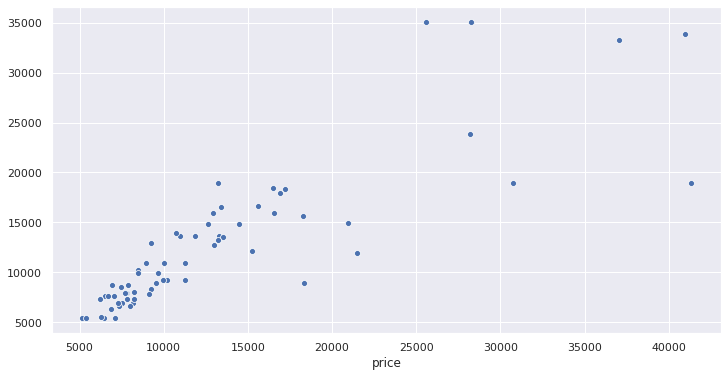

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_test,predictions)

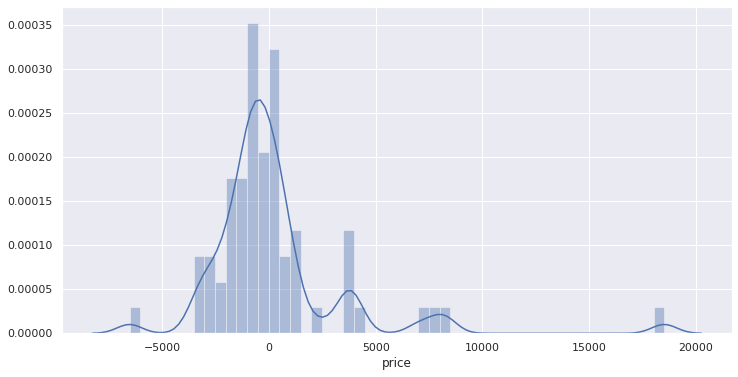

In [29]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-rf_predictions),bins=50)

In [30]:
importances_rfc = rf.feature_importances_ # The impurity-based feature importances.

In [39]:
importances_rfc_df = pd.DataFrame(importances_rfc, index=X.columns, columns=['Importance'])
importances_rfc_df = importances_rfc_df.sort_values(by='Importance', ascending=False)
importances_rfc_df = importances_rfc_df.head(15)
importances_rfc_df.head()

,Importance
curb-weight,0.502131
highway-mpg,0.191014
horsepower,0.085812
city-mpg,0.046397
length,0.021561


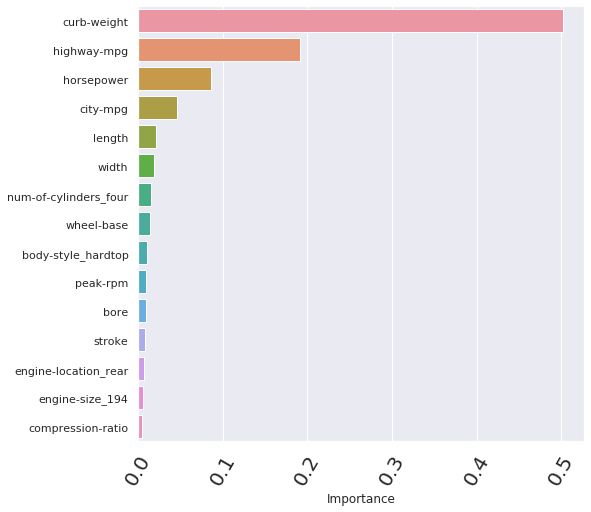

In [40]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=60, fontsize = 20)
sns.barplot(y=importances_rfc_df.index, x=importances_rfc_df['Importance'])

In [38]:
from sklearn.inspection import permutation_importance
# Permutation importance for feature evaluation

In [34]:
result = permutation_importance(rf, X_test, y_test, n_repeats=20,
                                random_state=42, n_jobs=-1)


In [35]:
importances_ = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance'])
importances_ = importances_.sort_values(by='Importance', ascending=False)
importances_ = importances_.head(20)
importances_.head()

,Importance
curb-weight,0.410371
highway-mpg,0.094712
horsepower,0.063743
city-mpg,0.024862
make_bmw,0.012833


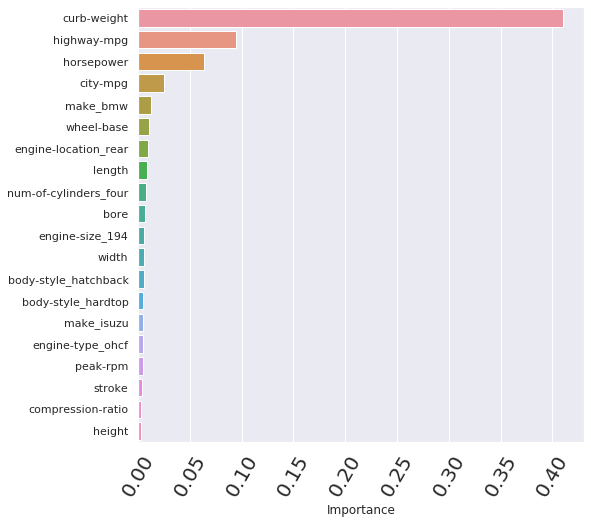

In [36]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=60, fontsize = 20)
sns.barplot(y=importances_.index, x=importances_['Importance'])

In [37]:
from sklearn.tree import export_graphviz
export_graphviz(rf.estimators_[0], 
                out_file='tree.dot', 
                feature_names = X.columns,
                filled = True)

Use [Web Graphviz](http://www.webgraphviz.com/) to visualize

![tree](tree.png)

Happy Coding!